<a href="https://colab.research.google.com/github/sultanbst123/Kaggle-Feedback-Prize-Evaluating-Student-Writing/blob/main/Evaluating_Student_Writing(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Singkat nya, kami memiliki banyak esai yang ditulis oleh anak-anak dalam rentang usia sekitar 12-18 tahun di mana kami harus menemukan urutan kata yang dapat diklasifikasikan sebagai salah satu dari 7 "jenis wacana". Ini:

- Lead = pengantar yang dengan statistik, kutipan, deskripsi, atau perangkat lain untuk menarik perhatian pembaca dan mengarah ke tesis
- Position = pendapat atau kesimpulan tentang pertanyaan utama
- Claim = klaim yang mendukung posisi
- Counterclaim = klaim yang menyangkal klaim lain atau memberikan alasan yang berlawanan untuk posisi tersebut
- Rebuttal = klaim yang menyangkal klaim balik
- Evidence = ide atau contoh yang mendukung klaim, klaim balik, atau sanggahan.
- Concluding Statement = pernyataan penutup yang menyatakan kembali klaim

## File & Library

In [ ]:
pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.stats import *
import random

import os 
from zipfile import ZipFile

import seaborn as sns
from wordcloud import WordCloud
import mplcyberpunk
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
import warnings 

warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [ ]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"

In [ ]:
# ambil file dari gdrive, lalu extract ke file lain

with ZipFile("/content/drive/MyDrive/Feedback prize/feedback-prize-2021.zip", "r") as zipobj:
     zipobj.extractall("Feedback prize")

In [ ]:
# ambil file txt

In [ ]:
train_files = os.listdir("/content/Feedback prize/train")
test_files = os.listdir("/content/Feedback prize/test")

for file in range(len(train_files)):
    train_files[file] = "/content/Feedback prize/train" + "/" + str(train_files[file])
    
for file in range(len(test_files)):
    test_files[file] = "/content/Feedback prize/test" + "/" + str(test_files[file])

## EDA

In [ ]:

# nama fitur dan penjelasannya

"""
id - kode ID untuk tanggapan esai
discourse_id - kode ID untuk elemen wacana
discourse_start - posisi karakter di mana elemen wacana dimulai dalam tanggapan esai
discourse_end - posisi karakter di mana elemen wacana berakhir di tanggapan esai
discourse_teks - teks elemen wacana
discourse_type - klasifikasi elemen wacana
discourse_type_num - label kelas yang disebutkan dari elemen wacana
predictionstring - indeks kata dari sampel pelatihan, seperti yang diperlukan untuk prediksi
"""

In [ ]:
train = pd.read_csv("/content/Feedback prize/train.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144293 entries, 0 to 144292
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  144293 non-null  object 
 1   discourse_id        144293 non-null  float64
 2   discourse_start     144293 non-null  float64
 3   discourse_end       144293 non-null  float64
 4   discourse_text      144293 non-null  object 
 5   discourse_type      144293 non-null  object 
 6   discourse_type_num  144293 non-null  object 
 7   predictionstring    144293 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.8+ MB


In [ ]:
# check duplicated 
train[train.duplicated()]

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring


In [ ]:

#check nan values
train.isnull().sum()

id                    0
discourse_id          0
discourse_start       0
discourse_end         0
discourse_text        0
discourse_type        0
discourse_type_num    0
predictionstring      0
dtype: int64

In [ ]:
train.sample(10)

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
101160,451D81265E8E,1.616086e+12,2067.0,2326.0,"The passage uses individual instances, like th...",Evidence,Evidence 2,344 345 346 347 348 349 350 351 352 353 354 35...
138457,BDD5D74671DD,1.617920e+12,517.0,569.0,"people clarify their thoughts, ideas, and deci...",Claim,Claim 1,90 91 92 93 94 95 96
26353,149F4C187FDA,1.619711e+12,661.0,827.0,At first it sound wierd to be called a Seagoin...,Claim,Claim 1,125 126 127 128 129 130 131 132 133 134 135 13...
22315,0CA02601D5C5,1.619380e+12,0.0,513.0,Summer break has always been the best time of ...,Lead,Lead 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
117500,3CA1D9450791,1.621532e+12,1237.0,1409.0,If students were able to take their schoolwor...,Claim,Claim 1,230 231 232 233 234 235 236 237 238 239 240 24...
34619,3AFA78FFFC15,1.616065e+12,788.0,971.0,one love something then do it because people ...,Claim,Claim 4,147 148 149 150 151 152 153 154 155 156 157 15...
50925,E518FBD13C3A,1.618961e+12,0.0,100.0,According to the article the Facial Action Cod...,Position,Position 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
26223,5B654ADA9ABC,1.620064e+12,0.0,379.0,For Luke this expierence was heart warming and...,Evidence,Evidence 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
108582,13502C406F65,1.620168e+12,1007.0,1077.0,\nIf policy 1 was chosen it would keep everyon...,Claim,Claim 2,180 181 182 183 184 185 186 187 188 189 190 19...
125724,AE56A078E096,1.621382e+12,810.0,1625.0,"going to school kinda nurses you into society,...",Evidence,Evidence 1,156 157 158 159 160 161 162 163 164 165 166 16...


In [ ]:
#discourse_type

In [ ]:
# by tabel
train.discourse_type.value_counts(normalize=True).to_frame()

,discourse_type
Claim,0.347959
Evidence,0.316731
Position,0.106859
Concluding Statement,0.093594
Lead,0.064487
Counterclaim,0.040314
Rebuttal,0.030057


Text(0, 0.5, 'discourse_type')

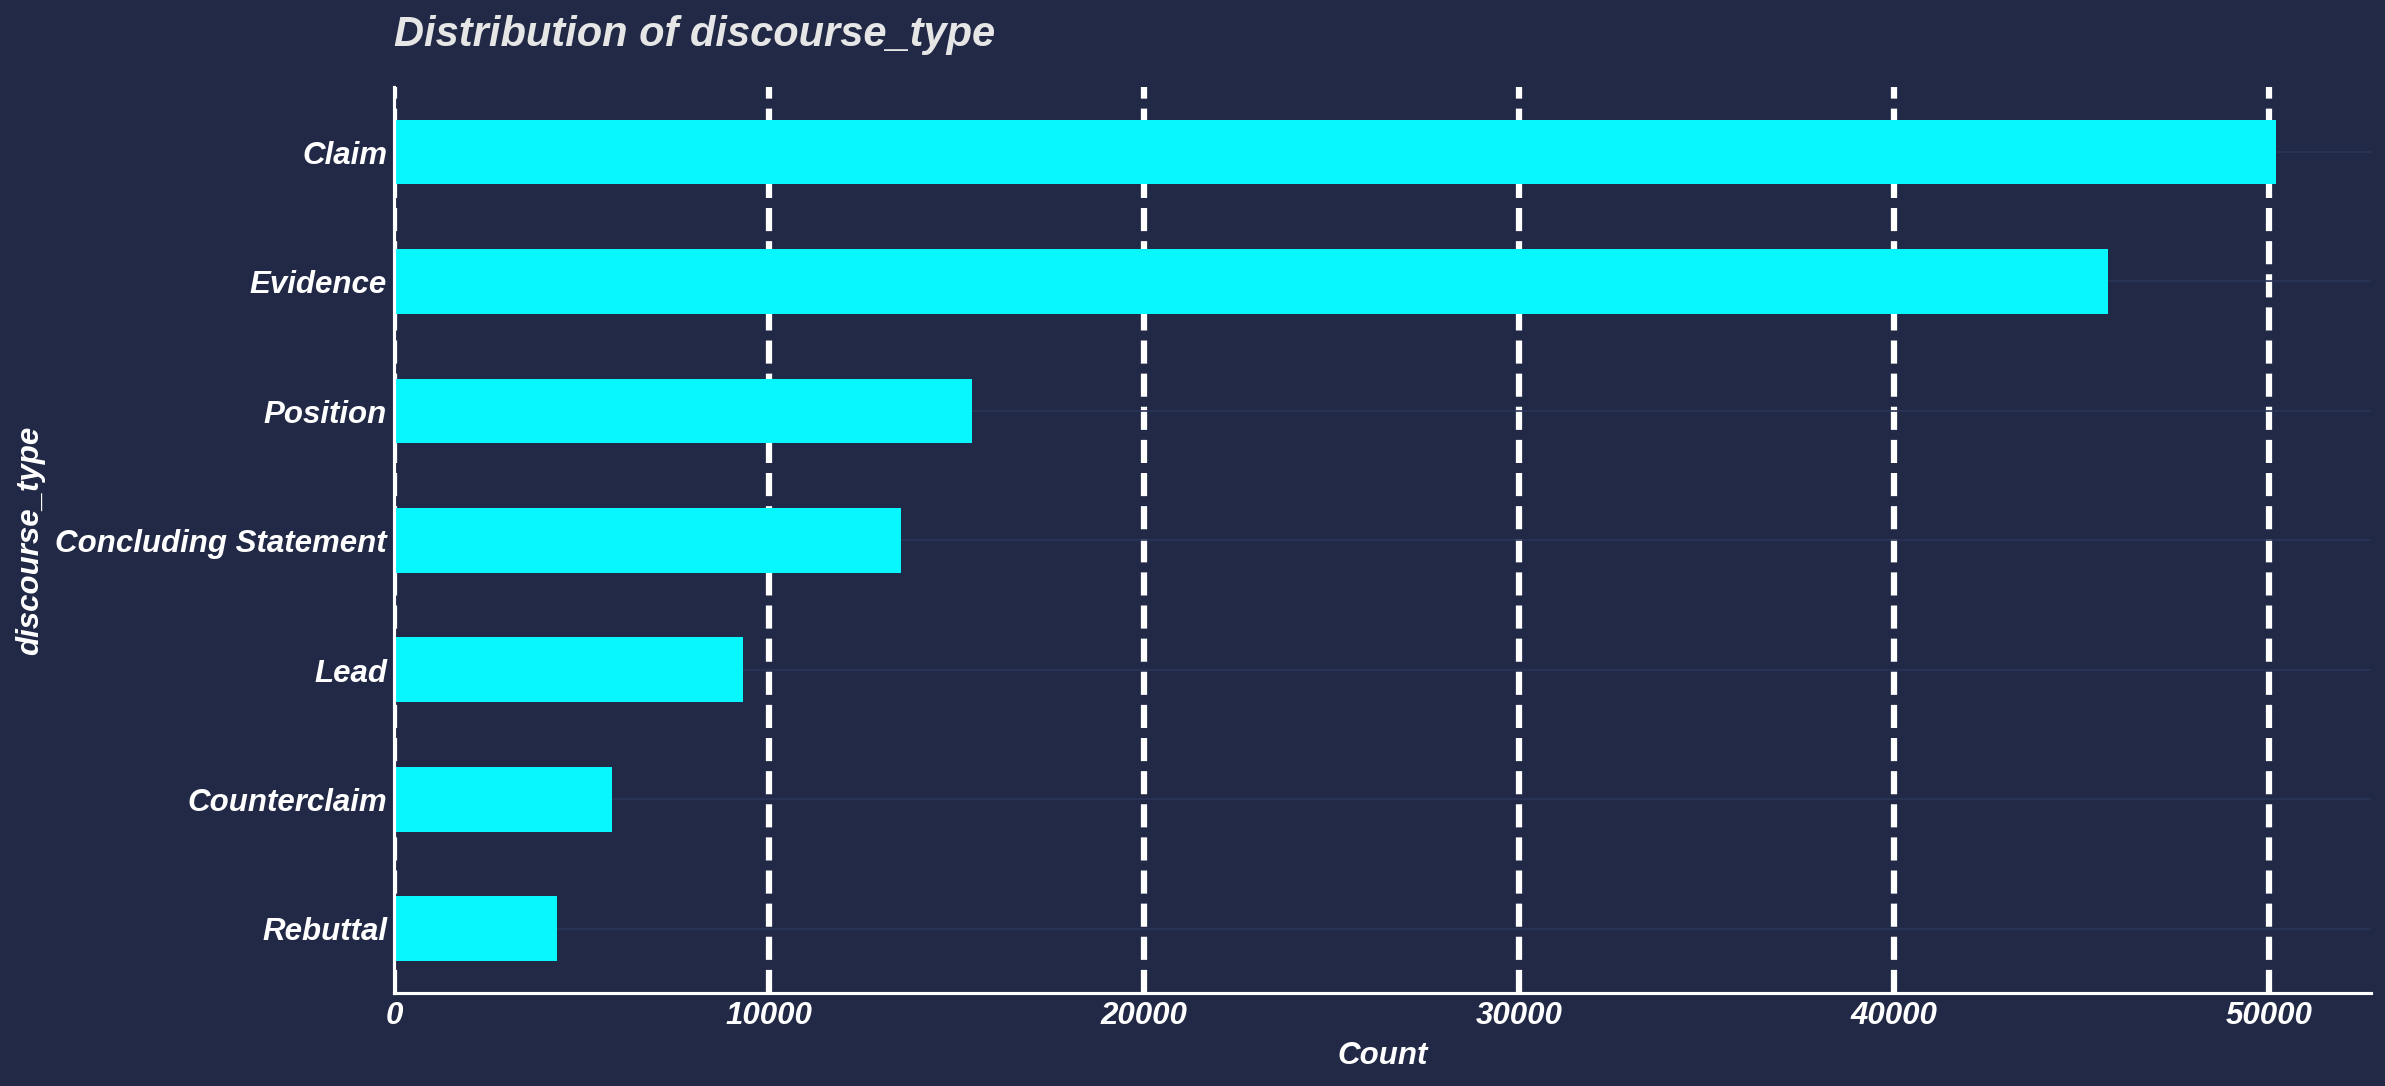

In [ ]:
#by chart
plt.figure(figsize=(17, 8)) 
train.discourse_type.value_counts().sort_values().plot(kind="barh")
plt.grid(axis="x", linestyle="--", color="white", linewidth=3)
plt.title("Distribution of discourse_type")
plt.xlabel("Count")
plt.ylabel("discourse_type")

In [ ]:
#discourse_type_num

In [ ]:
# by tabel
train.discourse_type_num.value_counts(normalize=True).to_frame()

,discourse_type_num
Evidence 1,0.107767
Position 1,0.106492
Claim 1,0.103449
Evidence 2,0.097163
Concluding Statement 1,0.092991
Claim 2,0.091564
Evidence 3,0.071888
Claim 3,0.068347
Lead 1,0.064459
Claim 4,0.038942


In [ ]:
#discourse_text & predictionstring

In [ ]:
# buat fitur baru, untuk melihat persmaan antara discourse_text & predictionstring

In [ ]:
train["discourse_text_len"] = train.discourse_text.str.split().str.len()
train["predictionstring_len"] = train.predictionstring.str.split().str.len()

In [ ]:
# check random text dan predictionstring
rnd_num = random.randint(0, len(train))
print("discourse_text: ")
print(train.discourse_text[rnd_num])

print(f"\ndiscourse_type: {train.discourse_type[rnd_num]}")

print("\ndiscourse_text to split ") 
print(train.discourse_text[rnd_num].split())

print("\ndiscourse_text_len") 
print(train.discourse_text_len[rnd_num])

print("\npredictionstring_len")
print(train.predictionstring_len[rnd_num])

discourse_text: 
because they can get more free time 

discourse_type: Claim

discourse_text to split 
['because', 'they', 'can', 'get', 'more', 'free', 'time']

discourse_text_len
7

predictionstring_len
7


In [ ]:

# check persamaan nya dengan duplicated() 

train[["discourse_text_len", "predictionstring_len"]].duplicated().value_counts(normalize=True)

True     0.995821
False    0.004179
dtype: float64

In [ ]:
# ada 603(0.004%) yang tidak sama

In [ ]:
# lihat descriptive analysis dari panjang kata text berdasarkan type nya

In [ ]:

#by tabel

train.groupby("discourse_type")["discourse_text_len"].describe()[["mean", "min", "max"]]

,mean,min,max
discourse_type,,,
Claim,17.420152,1.0,146.0
Concluding Statement,61.307886,2.0,440.0
Counterclaim,24.035757,1.0,215.0
Evidence,77.365520,2.0,836.0
Lead,51.946803,1.0,542.0
Position,18.245930,1.0,141.0
Rebuttal,28.092921,2.0,279.0


In [ ]:
## buat n_gram text berdasarkan type nya

In [ ]:
#gunakan CountVectorizer
def get_n_grams(n_grams, top_n = 10):
    df_words = pd.DataFrame()
    for dt in train['discourse_type'].unique():
        df = train.query('discourse_type == @dt')
        texts = df['discourse_text'].tolist()
        vec = CountVectorizer(lowercase = True, stop_words = 'english',\
                              ngram_range=(n_grams, n_grams)).fit(texts)
        bag_of_words = vec.transform(texts)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        cvec_df = pd.DataFrame.from_records(words_freq,\
                                            columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
        cvec_df.insert(0, "Discourse_type", dt)
        cvec_df = cvec_df.iloc[:top_n,:]
        df_words = df_words.append(cvec_df)
    return df_words

In [ ]:

# lihat ngrams dari text top 10 dari type

unigrams = get_n_grams(n_grams = 1, top_n=10)
bigrams = get_n_grams(n_grams = 2, top_n=10)
trigrams = get_n_grams(n_grams = 3, top_n=10)

In [ ]:
# dengan tabel

In [ ]:
unigrams

,Discourse_type,words,counts
4045,Lead,students,4296
18,Lead,people,4064
216,Lead,school,3211
341,Lead,cars,2115
3390,Lead,summer,1590
433,Lead,like,1510
35,Lead,time,1414
9859,Lead,electoral,1368
50,Lead,think,1355
6048,Lead,advice,1320


In [ ]:
bigrams

,Discourse_type,words,counts
73564,Lead,electoral college,1179
63518,Lead,driverless cars,808
55,Lead,cell phones,592
19359,Lead,summer projects,513
85397,Lead,distance learning,468
85366,Lead,classes home,426
54458,Lead,face mars,362
149,Lead,united states,327
85365,Lead,attend classes,324
73559,Lead,popular vote,295


In [ ]:
trigrams

,Discourse_type,words,counts
62344,Lead,facial action coding,265
117759,Lead,attend classes home,263
117929,Lead,online video conferencing,208
117758,Lead,students attend classes,179
117946,Lead,offer distance learning,171
117837,Lead,distance learning option,155
117928,Lead,way online video,151
117947,Lead,learning option students,150
117950,Lead,home way online,149
117945,Lead,schools offer distance,144


In [ ]:
# dengan chart

In [ ]:
def plot_ngram(df, type = "unigrams"):
    plt.figure(figsize=(17, 20))
    plt.subplots_adjust(hspace=0.5)

    for n, dt in enumerate(df.Discourse_type.unique()):
        ax = plt.subplot(4, 2, n + 1)
        ax.set_title(f"Most used {type} in {dt}")
        data = df.query('Discourse_type == @dt')[['words', 'counts']].set_index("words").sort_values(by = "counts", ascending = True)
        data.plot(ax=ax, kind = 'barh', legend = None)
        plt.grid(axis="x", linewidth=2, linestyle="--", color="white") 
        plt.xlabel("Count")
        plt.ylabel("Words") 
   
    plt.suptitle(type, size=30, y = 1.05) 
    plt.tight_layout()
    plt.show()

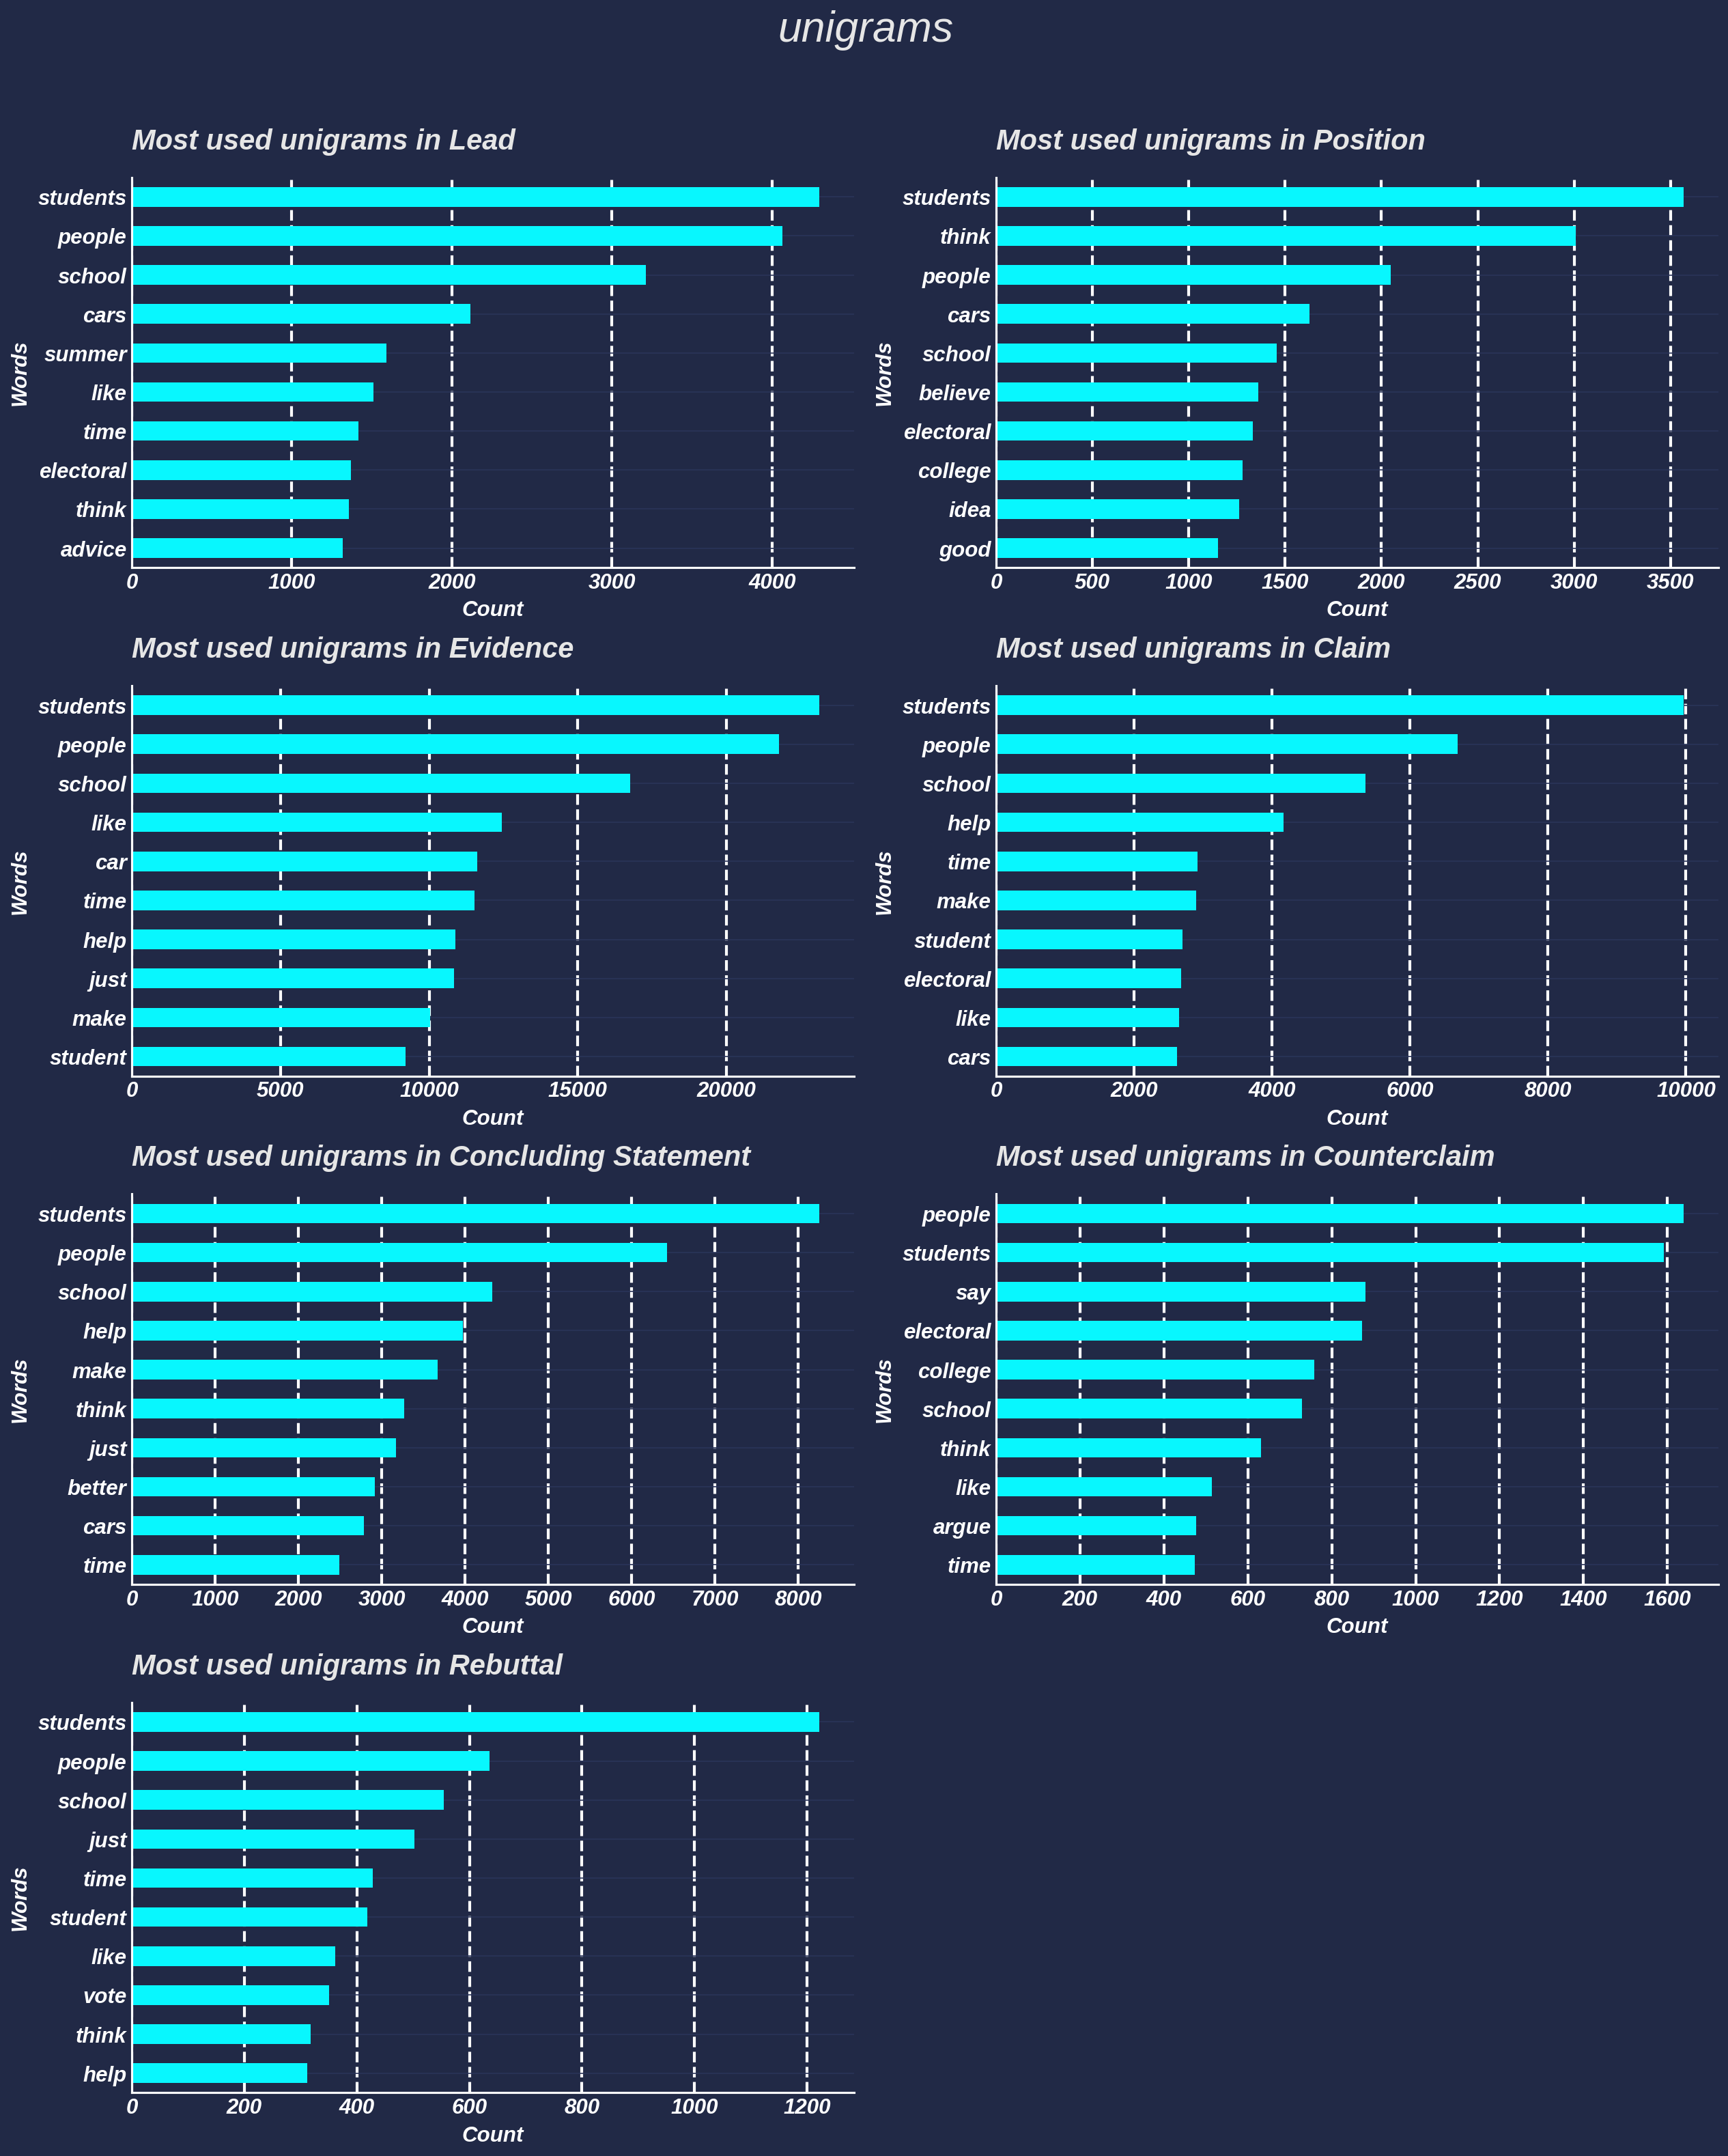

In [ ]:
plot_ngram(unigrams)

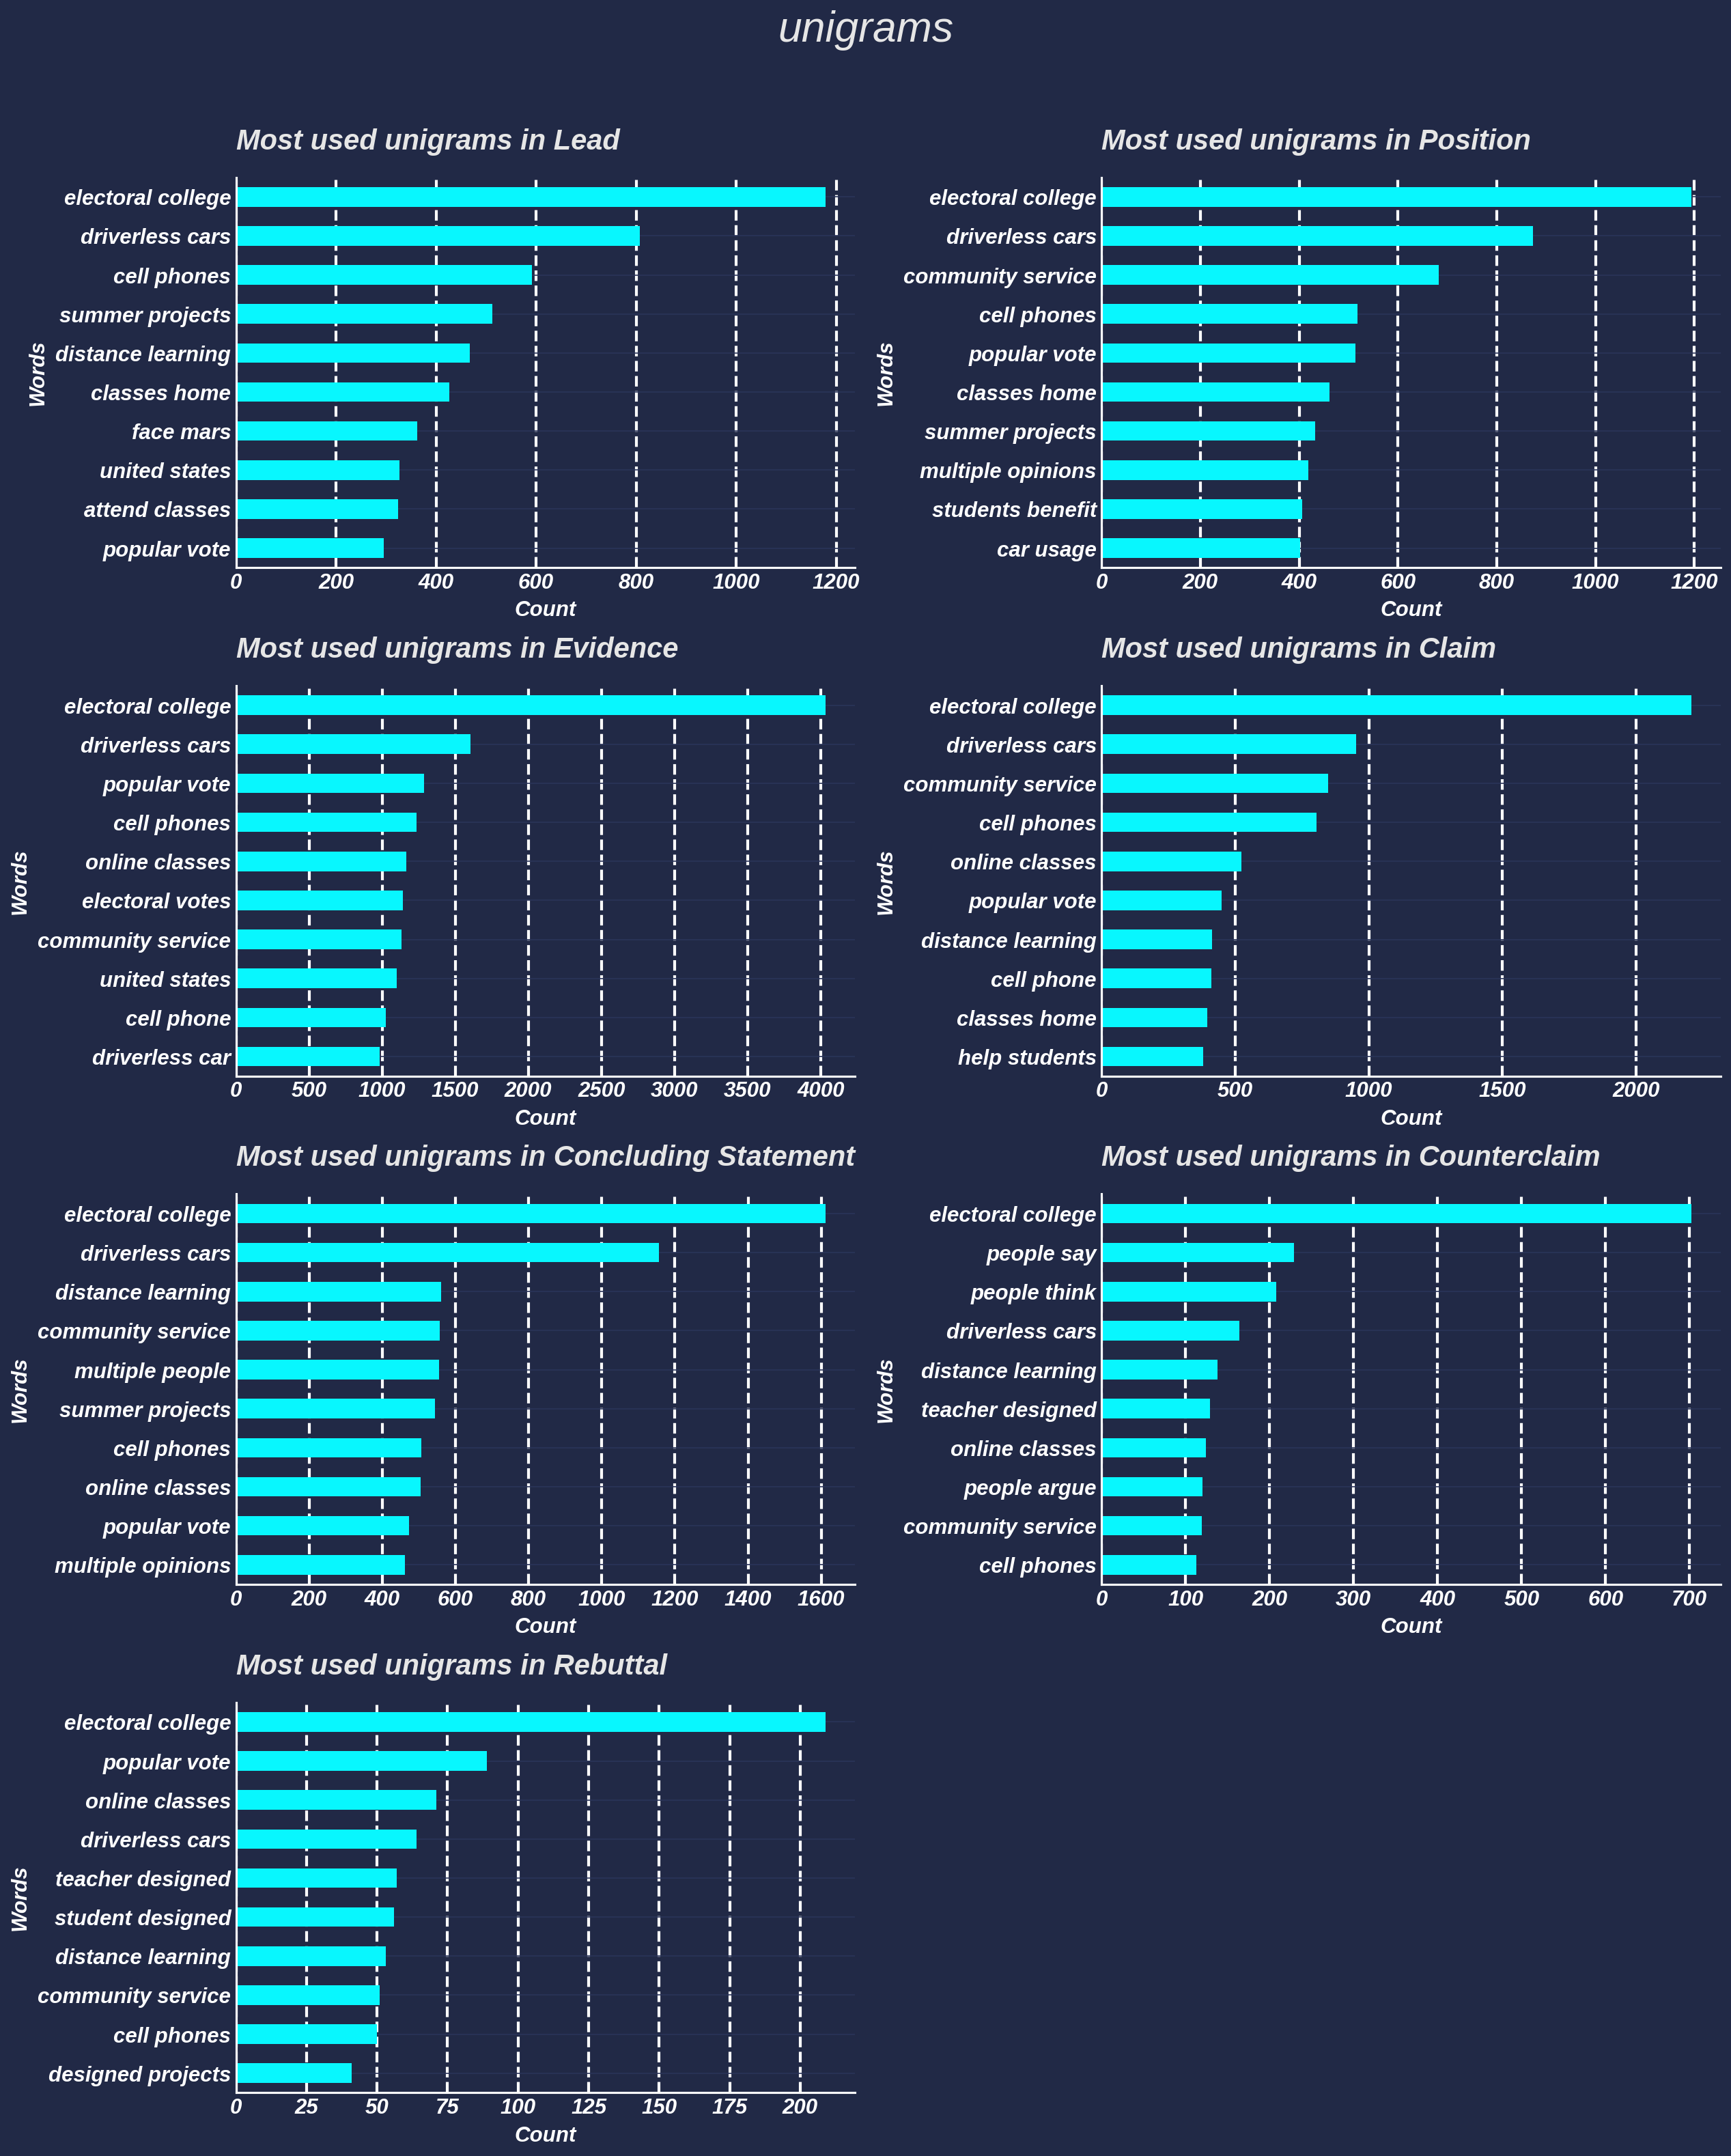

In [ ]:
plot_ngram(bigrams)

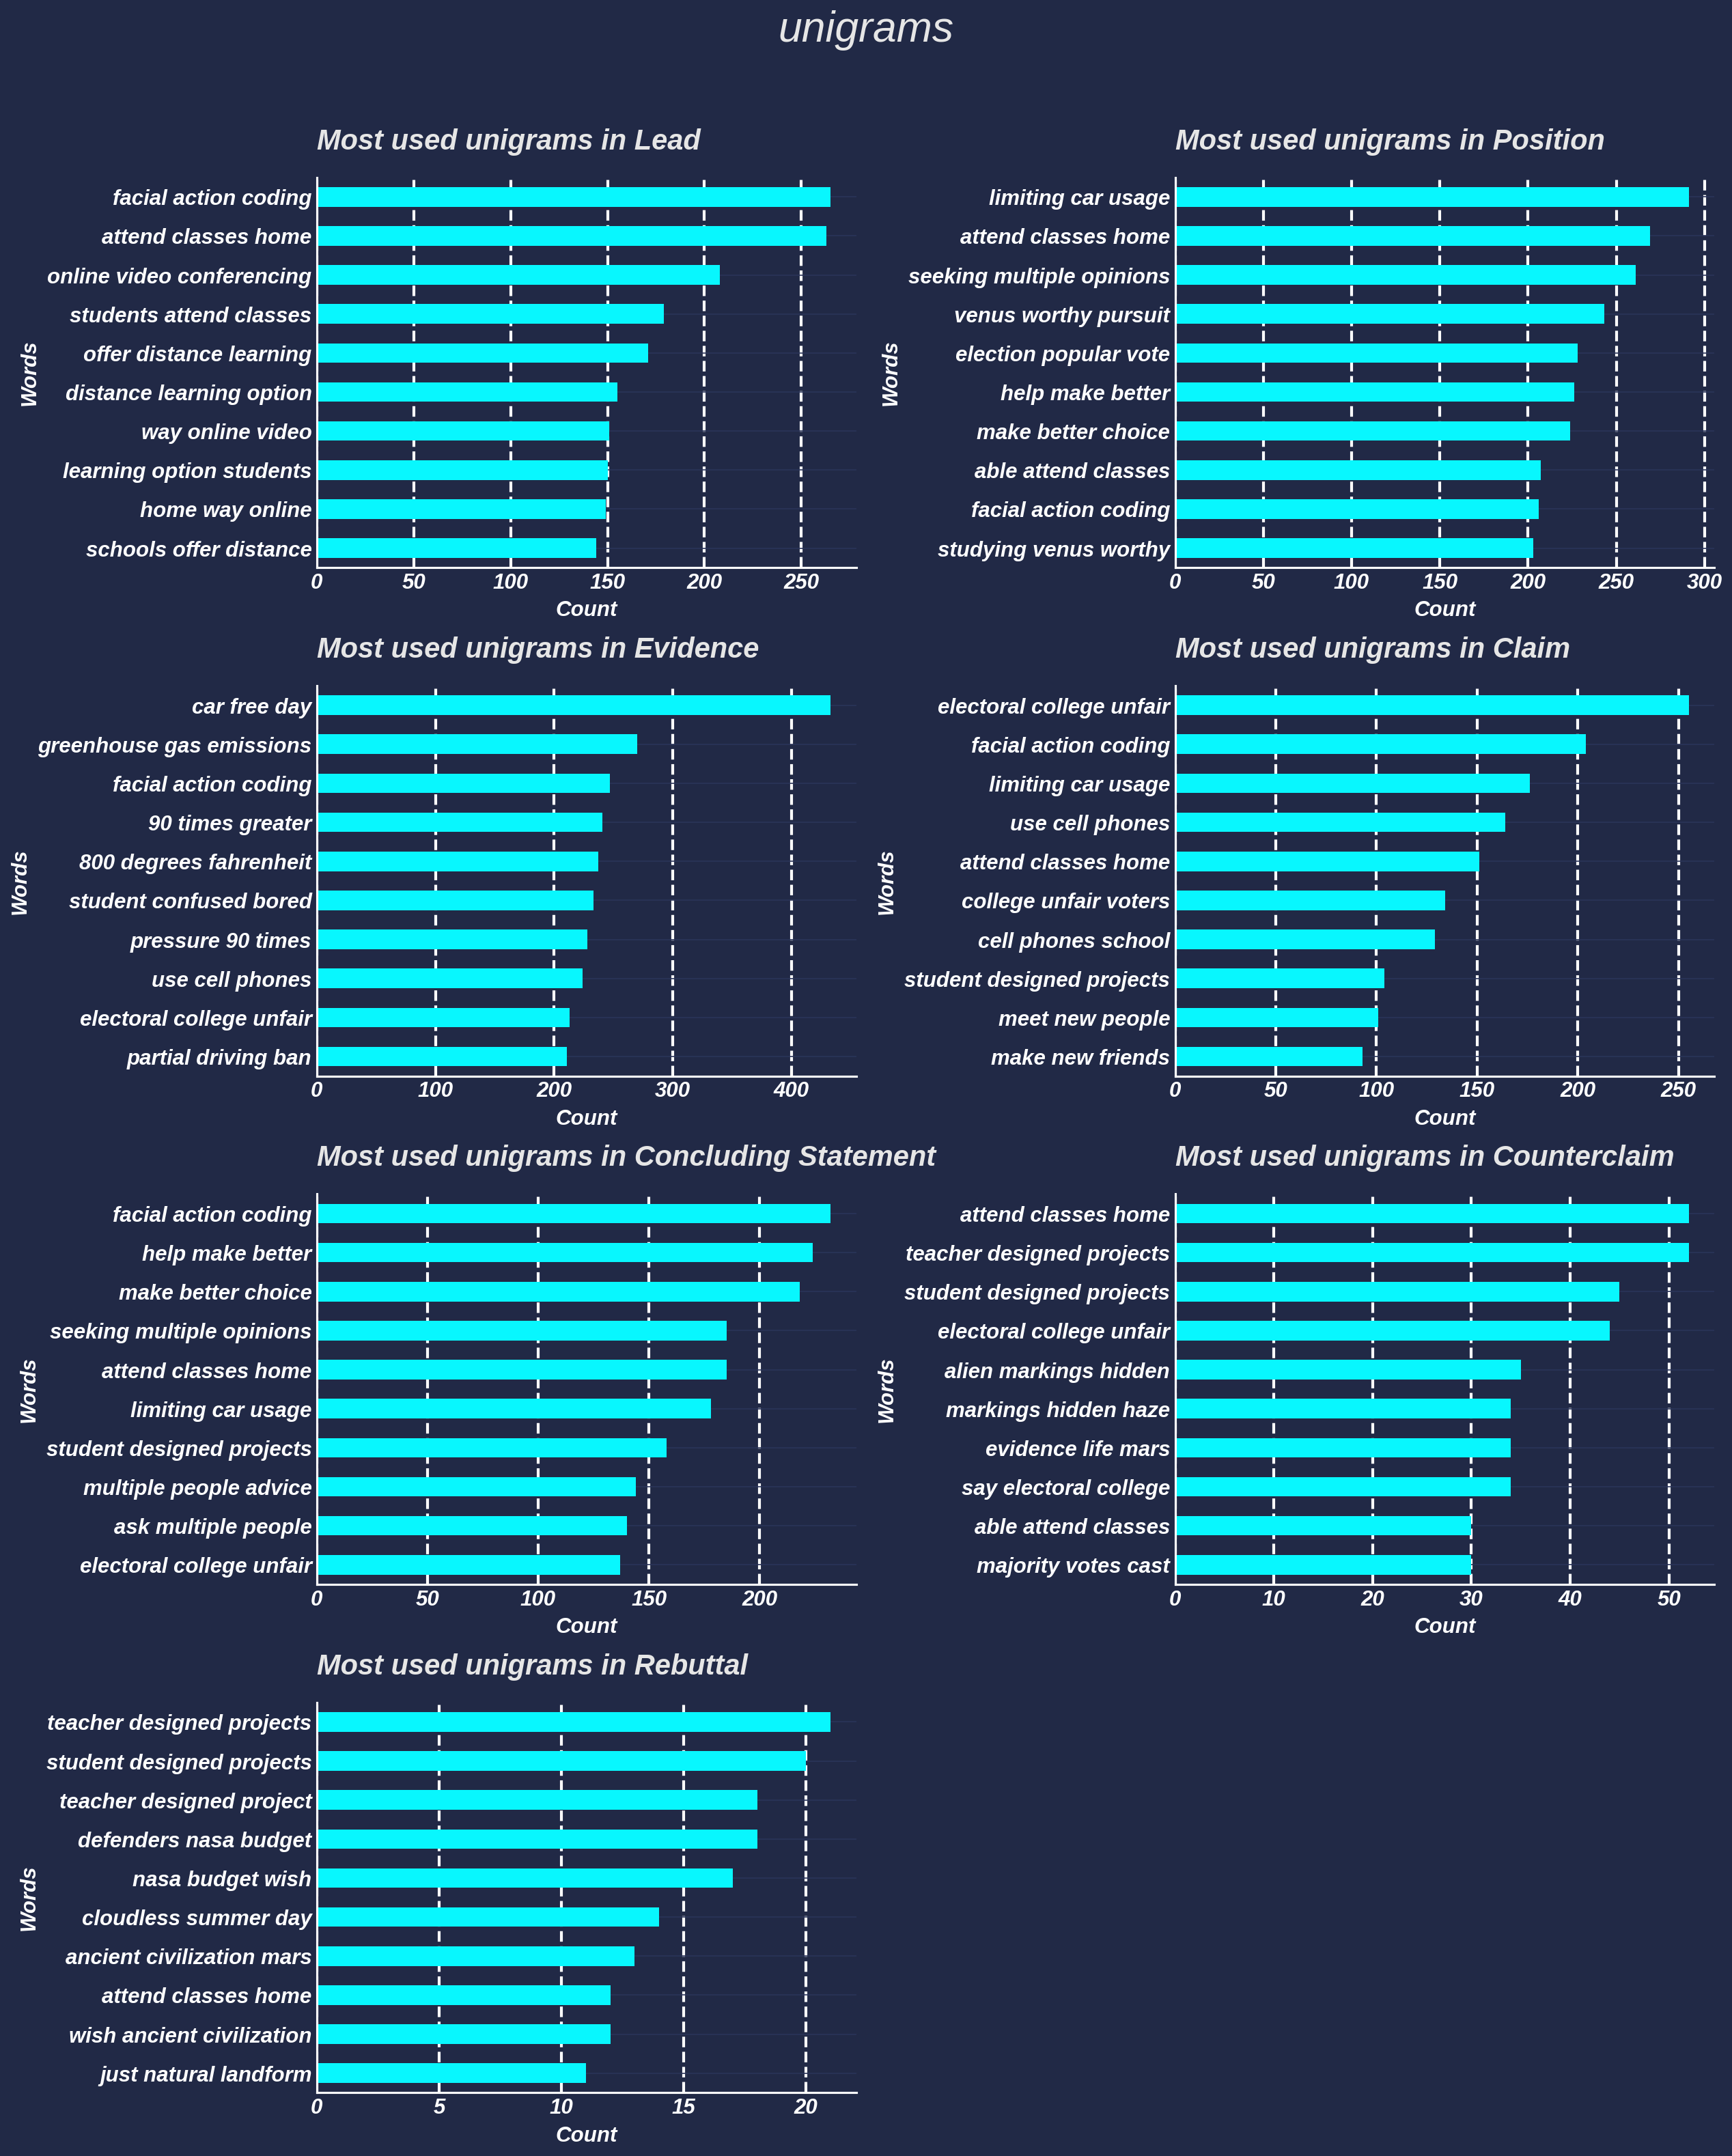

In [ ]:
plot_ngram(trigrams)

In [ ]:
# lihat text sebelum di tanda-i

In [ ]:
# jumlah file txt di train dan test

In [ ]:
print(f"total jumlah dari file txt train adalah: {len(train_files)} file")
print(f"total jumlah dari file txt test adalah: {len(test_files)} file")

total jumlah dari file txt train adalah: 15594 file
total jumlah dari file txt test adalah: 5 file


In [ ]:
# check text file 
f = open(train_files[random.randint(0, len(train_files))], "r")
print(f.read())

In a school, there are clasrooms upon classrooms that are all teaching different, new, and exciting classes. When walking down a hallway, it is more than possible that the sounds of logorithmic functions could be taught to your left as Shakespeare might be being recited to your right. If you take a turn, one kid may be leaving his photography class to go take pictures for the yearbook while another may be returning from the restroom to go back to her chemistry class where she is studying saturated and unstaurated solutions. Despite the intense differences and varities of classes that there are at a high school, not every one of them is "new", "different", and "exciting," as used previously to describe the classrooms scenes to all kids. Therefore, if it were at all possible that these kids could feel and want to be more engaged in their classes that take up a large portion of their week and youth, the way to do so should be evident in the classrooms. With this in mind, the idea that usi

In [ ]:

## saya akan memakai longformer(transformer khusus text yang panjang)